In [ ]:
from exchange_rl.environment.env import Exchange
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
IPO = {"S1": (10, 2000)}  # price, qty
e = Exchange(2, 100000, IPO)  # 2 agents
e.place_add_order('T1', "S1", buy_sell='buy', qty=2000, price=10) # 1st agent buying
# print(e.stocks['S1'].order_history)

share_price=[]
total_funds=[]
t1_funds=[]
t2_funds=[]
profit_accrued=0
for i in range(20):
    curr_price= e.stocks['S1']._last_settled_price
    ask_price=curr_price+np.random.normal(loc=0, scale=1.0)
    bid_price=curr_price+np.random.normal(loc=0, scale=1.0)
    e.place_add_order('T1', "S1", buy_sell='sell', qty=1, price=ask_price) # 1st agent selling
    e.place_add_order('T2', "S1", buy_sell='buy', qty=1, price=bid_price) # 2nd agent buying
    share_price.append(e.stocks['S1']._last_settled_price)
    total_funds.append(e.agents['T1'].total_funds+ e.agents['T2'].total_funds)
    t1_funds.append(e.agents['T1'].total_funds)
    t2_funds.append(e.agents['T2'].total_funds)
    print(len(e.stocks['S1'].trade_book))
    profit_accrued+=ask_price

### Note: both the agents stocks are pointing to the global stocks object defined in environment
### print(id(e.agents['T1'].portfolio['S1'][0]))
### print(id(e.agents['T2'].portfolio['S1'][0]))

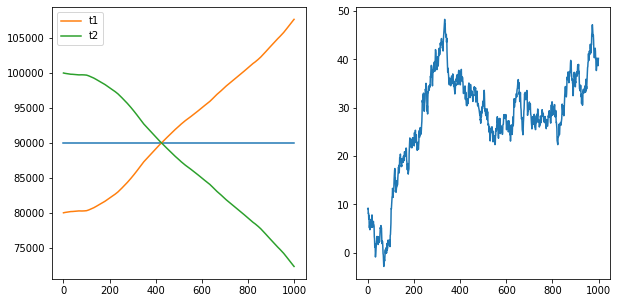

In [23]:
# plt.plot(share_price)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot([i/2 for i in total_funds])
ax[0].plot(t1_funds, label='t1')
ax[0].plot(t2_funds, label='t2')
ax[1].plot(share_price)
ax[0].legend()

In [163]:
profit_accrued

-941.358764379206

In [166]:
t1_funds[-1]-t1_funds[0]

-941.3587643791107

In [165]:
t2_funds[-1]-t2_funds[0]

949.972235086927

In [246]:
num_agents=1000

IPO = {"S1": (10, 200000)}  # price, qty
e = Exchange(num_agents, 1000000, IPO)  # 2 agents
for i in range(1,num_agents+1):
    e.place_add_order('T'+str(i), "S1", buy_sell='buy', qty=200, price=10) # 1st agent buying
share_price=[]

for i in range(100):
    curr_price= e.stocks['S1']._last_settled_price
    next_price=curr_price+np.random.normal(loc=0, scale=1.0)
    agent_num=str(random.randint(1, num_agents))
    e.place_add_order('T'+agent_num, "S1", buy_sell=random.choice(['buy', 'sell']), qty=random.randint(1, 3), price=next_price) # 1st agent buying
#     print('T'+agent_num)
    share_price.append(e.stocks['S1']._last_settled_price)

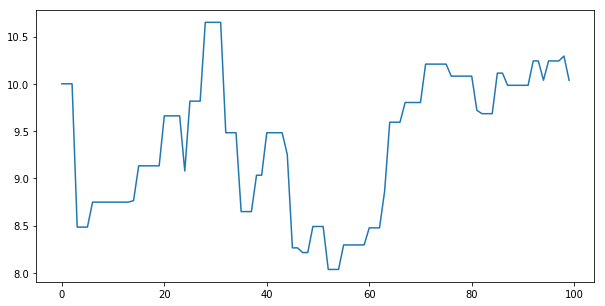

In [247]:
# plt.plot(share_price)
fig, ax = plt.subplots(1,1, figsize=(10,5))
# ax[0].plot([i/2 for i in total_funds])
# ax[0].plot(t1_funds, label='t1')
# ax[0].plot(t2_funds, label='t2')
ax.plot(share_price)
# ax[0].legend()

In [176]:
random.choice(x)

'b'